# Examples for Querying our API

Refer to the endpoint documentation in our `README` or to the definitions in `curvemetrics/app/app.py`.

In [2]:
import requests as req
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from curvemetrics.src.classes.datahandler import DataHandler

URL = "http://172.104.8.91/"

In [3]:
datahandler = DataHandler()

# Shannon's Entropy

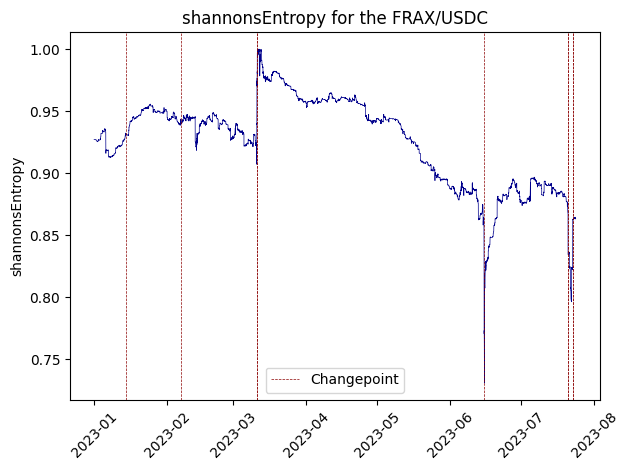

In [4]:
# NOTE: Shannon's Entropy
endpoint = 'pool_metrics'
pool = '0xdcef968d416a41cdac0ed8702fac8128a64241a2'
name = datahandler.pool_metadata[pool]["name"].replace('Curve.fi ', '')
metric = 'shannonsEntropy'
start = int(datetime.timestamp(datetime(2023, 1, 1)))
end = int(datetime.timestamp(datetime.now()))
params = {
    'pool_id': pool,
    'metric': metric,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
if response.status_code == 200:
    series = pd.DataFrame.from_dict(response.json(), orient='index', columns=[metric])
    series.index = pd.to_datetime(pd.to_numeric(series.index), unit='s')
else:
    print('Request failed.')

# NOTE: Changepoints
endpoint = 'changepoints'
model = 'bocd'
params = {
    'address': pool,
    'model': model,
    'metric': metric,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
if response.status_code == 200:
    cps = list(response.json().values())
else:
    print('Request failed.')

f, ax = plt.subplots()

ax.plot(series.index, series, color='darkblue', linewidth=0.5)
if len(cps):
    for cp in cps:
        ax.axvline(datetime.fromtimestamp(cp), color='darkred', linestyle='--', linewidth=0.5)
    ax.plot([], [], color='darkred', linewidth=0.5, linestyle='--', label='Changepoint')
ax.tick_params(axis='x', rotation=45)
ax.set_title(f'{metric} for the {name}')
ax.set_ylabel(metric)
ax.legend()
f.tight_layout()

In [5]:
# NOTE: Changepoint detected at 9pm UTC on March 10th, 2023
series.loc['2023-03-10'].resample('1h').last()

,shannonsEntropy
2023-03-10 00:00:00,0.931148
2023-03-10 01:00:00,0.930872
2023-03-10 02:00:00,0.930899
2023-03-10 03:00:00,0.930146
2023-03-10 04:00:00,0.930115
2023-03-10 05:00:00,0.926675
2023-03-10 06:00:00,0.926310
2023-03-10 07:00:00,0.926361
2023-03-10 08:00:00,0.926299
2023-03-10 09:00:00,0.926319


# Net Swap Flow

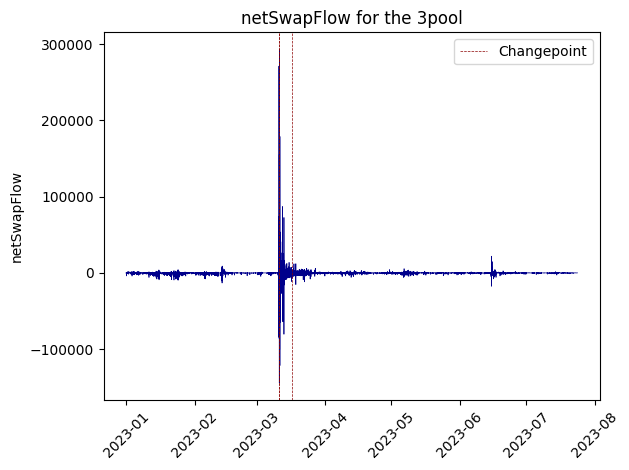

In [6]:
# NOTE: Net Swap Flow
endpoint = 'pool_X' # <- pool_X not pool_metrics for the underlying signal
pool = '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7'
metric = 'netSwapFlow'
start = int(datetime.timestamp(datetime(2023, 1, 1)))
end = int(datetime.timestamp(datetime.now()))

params = {
    'pool_id': pool,
    'metric': metric,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
series = pd.DataFrame.from_dict(response.json(), orient='index', columns=[metric])
series.index = pd.to_datetime(pd.to_numeric(series.index), unit='s')

# NOTE: Changepoints
endpoint = 'changepoints'
model = 'bocd'
params = {
    'address': pool,
    'model': model,
    'metric': metric,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
cps = list(response.json().values())

f, ax = plt.subplots()

ax.plot(series.index, series, color='darkblue', linewidth=0.5)
if len(cps):
    for cp in cps:
        ax.axvline(datetime.fromtimestamp(cp), color='darkred', linestyle='--', linewidth=0.5)
    ax.plot([], [], color='darkred', linewidth=0.5, linestyle='--', label='Changepoint')
ax.tick_params(axis='x', rotation=45)
ax.set_title(f'{metric} for the 3pool')
ax.set_ylabel(metric)
ax.legend()
f.tight_layout()

# 5-Minute Markout

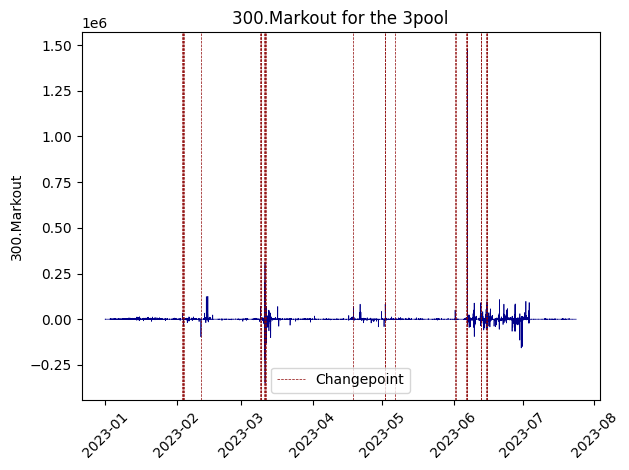

In [7]:
# NOTE: Net Swap Flow
endpoint = 'pool_X' # <- pool_X not pool_metrics for the underlying signal
pool = '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7'
metric = '300.Markout'
start = int(datetime.timestamp(datetime(2023, 1, 1)))
end = int(datetime.timestamp(datetime.now()))

params = {
    'pool_id': pool,
    'metric': metric,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
series = pd.DataFrame.from_dict(response.json(), orient='index', columns=[metric])
series.index = pd.to_datetime(pd.to_numeric(series.index), unit='s')

# NOTE: Changepoints
endpoint = 'changepoints'
model = 'bocd'
params = {
    'address': pool,
    'model': model,
    'metric': metric,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
cps = list(response.json().values())
f, ax = plt.subplots()

ax.plot(series.index, series, color='darkblue', linewidth=0.5)
if len(cps):
    for cp in cps:
        ax.axvline(datetime.fromtimestamp(cp), color='darkred', linestyle='--', linewidth=0.5)
    ax.plot([], [], color='darkred', linewidth=0.5, linestyle='--', label='Changepoint')
ax.tick_params(axis='x', rotation=45)
ax.set_title(f'{metric} for the 3pool')
ax.set_ylabel(metric)
ax.legend()
f.tight_layout()

In [32]:
[datetime.fromtimestamp(cp) for cp in cps]

[datetime.datetime(2023, 2, 3, 11, 0),
 datetime.datetime(2023, 2, 3, 13, 0),
 datetime.datetime(2023, 2, 3, 23, 0),
 datetime.datetime(2023, 2, 4, 2, 0),
 datetime.datetime(2023, 2, 11, 12, 0),
 datetime.datetime(2023, 3, 9, 7, 0),
 datetime.datetime(2023, 3, 9, 8, 0),
 datetime.datetime(2023, 3, 9, 11, 0),
 datetime.datetime(2023, 3, 10, 21, 0),
 datetime.datetime(2023, 3, 11, 6, 0),
 datetime.datetime(2023, 3, 11, 7, 0),
 datetime.datetime(2023, 3, 11, 15, 0),
 datetime.datetime(2023, 4, 18, 14, 0),
 datetime.datetime(2023, 5, 2, 9, 0),
 datetime.datetime(2023, 5, 2, 11, 0),
 datetime.datetime(2023, 5, 6, 17, 0),
 datetime.datetime(2023, 6, 1, 16, 0),
 datetime.datetime(2023, 6, 1, 19, 0),
 datetime.datetime(2023, 6, 6, 5, 0),
 datetime.datetime(2023, 6, 6, 22, 0),
 datetime.datetime(2023, 6, 6, 23, 0),
 datetime.datetime(2023, 6, 12, 19, 0),
 datetime.datetime(2023, 6, 12, 22, 0)]

# Takers Ranking!

In [9]:
# NOTE: Takers
endpoint = 'takers'
response = req.get(URL + endpoint)
if response.status_code == 200:
    takers = pd.DataFrame.from_dict(response.json())
    display(takers.head())
else:
    print('Request failed.')

,amountBought,amountSold,count,cumulativeMarkout,meanMarkout,windowSize
0,5.064775e+07,5.045182e+07,55.0,1.720375e+07,312795.532169,86400
1,1.817948e+09,1.849345e+09,8162.0,1.695915e+07,2077.817564,86400
2,3.688397e+09,3.683146e+09,16809.0,1.293697e+07,769.645622,86400
3,6.762094e+08,6.843936e+08,1637.0,1.143750e+07,6986.866421,86400
4,4.954012e+08,4.954053e+08,1905.0,8.380981e+06,4399.465348,86400


# LP Share Price

In [3]:
# NOTE: Shannon's Entropy
endpoint = 'pool_metrics'
pool = '0xdc24316b9ae028f1497c275eb9192a3ea0f67022'
metric = 'lpSharePrice'
start = int(datetime.timestamp(datetime(2023, 1, 1)))
end = int(datetime.timestamp(datetime(2023, 6, 1)))
params = {
    'pool_id': pool,
    'metric': metric,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
if response.status_code == 200:
    df = pd.DataFrame.from_dict(response.json(), orient='index', columns=[metric])
    df.index = pd.to_datetime(pd.to_numeric(df.index), unit='s')
else:
    print('Request failed.')
df

,lpSharePrice
2023-01-01 00:00:00,1259.733185
2023-01-01 00:01:00,1259.778765
2023-01-01 00:02:00,1259.691404
2023-01-01 00:03:00,1259.615440
2023-01-01 00:04:00,1259.797757
...,...
2023-05-31 23:56:00,2008.942492
2023-05-31 23:57:00,2009.117968
2023-05-31 23:58:00,2009.070111
2023-05-31 23:59:00,2009.203047


In [4]:
# NOTE: Shannon's Entropy
endpoint = 'ohlcv'
token = '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee'
start = int(datetime.timestamp(datetime(2023, 1, 1)))
end = int(datetime.timestamp(datetime(2023, 6, 1)))
params = {
    'token_id': token,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
if response.status_code == 200:
    series = pd.DataFrame(response.json())
    series.set_index('timestamp', inplace=True)
    series.index = pd.to_datetime(pd.to_numeric(series.index), unit='s')
else:
    print('Request failed.')
series

,close,symbol
timestamp,,
2023-01-01 00:00:00,1195.52,ETH/USD
2023-01-01 00:01:00,1195.64,ETH/USD
2023-01-01 00:02:00,1195.41,ETH/USD
2023-01-01 00:03:00,1195.21,ETH/USD
2023-01-01 00:04:00,1195.69,ETH/USD
...,...,...
2023-05-31 23:56:00,1873.62,ETH/USD
2023-05-31 23:57:00,1873.95,ETH/USD
2023-05-31 23:58:00,1873.86,ETH/USD


<Axes: >

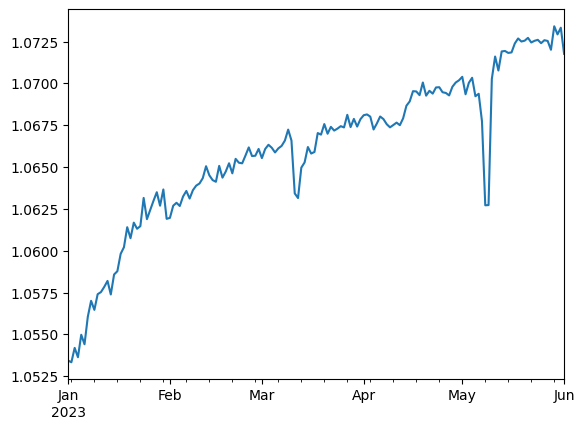

In [8]:
# df = df.join(series).ffill()
# df = df.drop(['symbol'], axis=1)
# df = df.resample('1d').mean()
df['lpSharePrice_norm'] = df['lpSharePrice'] / df['close']
df['lpSharePrice_norm'].plot()

In [12]:
endpoint = 'snapshots'
pool = '0xdc24316b9ae028f1497c275eb9192a3ea0f67022'
start = int(datetime.timestamp(datetime(2023, 1, 1)))
end = int(datetime.timestamp(datetime(2023, 6, 1)))
params = {
    'pool_id': pool,
    'start': start,
    'end': end
}
response = req.get(URL + endpoint, params=params)
if response.status_code == 200:
    foo = pd.DataFrame(response.json())
    foo.set_index('timestamp', inplace=True)
    foo.index = pd.to_datetime(pd.to_numeric(foo.index), unit='s')
else:
    print('Request failed.')
foo

,lpPriceUSD,normalizedReserves,reserves,reservesUSD,tvl,virtualPrice
timestamp,,,,,,
2023-01-01,1265.362230,"[229476160652097607133018, 4122864939100524526...","[229476160652097607133018, 4122864939100524526...","[277994616.4578435, 486481662.5562275]",7.644763e+08,1.061329e+18
2023-01-02,1273.226223,"[231290169611403513160436, 4110958558564087886...","[231290169611403513160436, 4110958558564087886...","[281789618.0861054, 488151124.13870823]",7.699407e+08,1.061410e+18
2023-01-03,1287.689565,"[235272926904828663775686, 4085564758951434471...","[235272926904828663775686, 4085564758951434471...","[289621949.5402733, 490805668.8982577]",7.804276e+08,1.061494e+18
2023-01-04,1284.682003,"[236144722338390315612183, 4065798399049765874...","[236144722338390315612183, 4065798399049765874...","[289898306.8129514, 487325398.6953709]",7.772237e+08,1.061581e+18
2023-01-05,1329.713936,"[240656450384806394585590, 4092511004440751298...","[240656450384806394585590, 4092511004440751298...","[305628324.54303193, 507787572.68935055]",8.134159e+08,1.061672e+18
...,...,...,...,...,...,...
2023-05-28,1961.399585,"[326570841680428249985790, 3288997386929109575...","[326570841680428249985790, 3288997386929109575...","[596864142.3928027, 600872612.0467789]",1.197737e+09,1.073391e+18
2023-05-29,2051.869186,"[325048472011279411963783, 3292069246866894930...","[325048472011279411963783, 3292069246866894930...","[621599651.6630887, 628983467.6989721]",1.250583e+09,1.073456e+18
2023-05-30,2032.185846,"[324351416400841914690880, 3287669262521599146...","[324351416400841914690880, 3287669262521599146...","[614256998.478266, 622088495.6877326]",1.236345e+09,1.073532e+18


<Axes: xlabel='timestamp'>

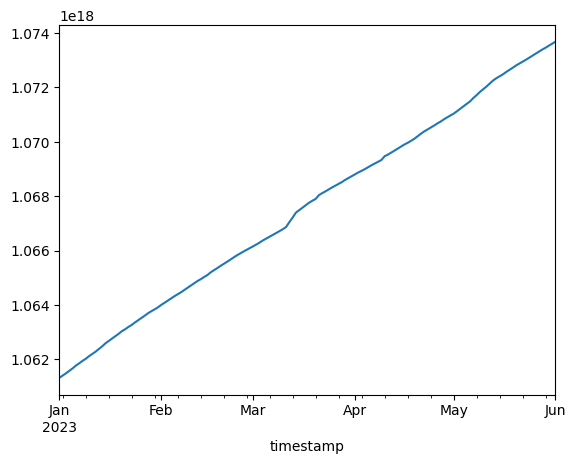

In [19]:
foo['virtualPrice'].plot()